In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

### PART 1

### Loading and preparing data:

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1)) / 255.0
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1)) / 255.0

### Construction of a convolutional neural network:

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model compilation and training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=30, batch_size=64, validation_split=0.2)

c:\Users\sikan\AppData\Local\pypoetry\Cache\virtualenvs\datasience-ZD1DWEDm-py3.12\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.6893 - loss: 0.8458 - val_accuracy: 0.8486 - val_loss: 0.4143
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8608 - loss: 0.3853 - val_accuracy: 0.8781 - val_loss: 0.3359
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8848 - loss: 0.3135 - val_accuracy: 0.8773 - val_loss: 0.3320
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8956 - loss: 0.2823 - val_accuracy: 0.8962 - val_loss: 0.2870
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9037 - loss: 0.2564 - val_accuracy: 0.8852 - val_loss: 0.3159
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9121 - loss: 0.2350 - val_accuracy: 0.8997 - val_loss: 0.2726
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9187 - loss: 0.2187 - val_accuracy: 0.9026 - val_loss: 0.2686
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9249 - loss: 0.2008 - 

In [4]:
print(f"Achieved accuracy on training {history.history['accuracy'][-1]} and test data {history.history['val_accuracy'][-1]} of our model")

Achieved accuracy on training 0.9866250157356262 and test data 0.906416654586792 of our model


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

### Let's plot accuracy and loss graphs on the training and test sets:

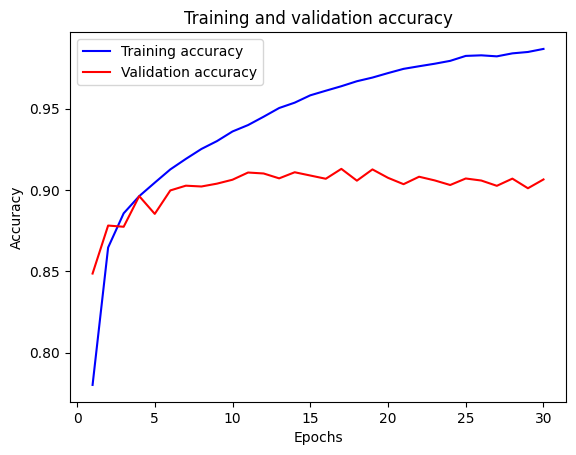

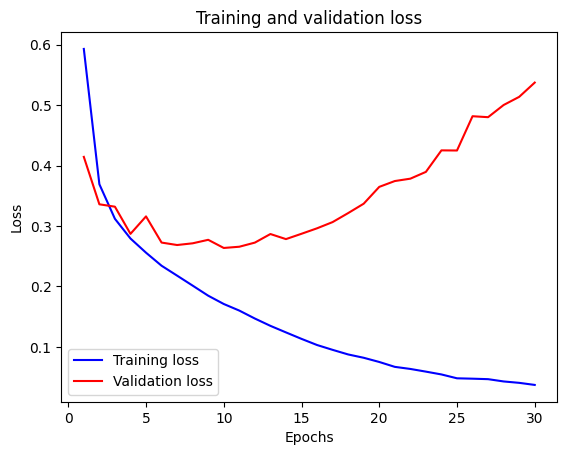

In [6]:
import matplotlib.pyplot as plt

# Get a history of accuracy and loss during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy graph
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plotting the loss graph
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Let's increase the number of epochs and decrease the number of batch sizes:

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model compilation and training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=30, batch_size=32, validation_split=0.2)

c:\Users\sikan\AppData\Local\pypoetry\Cache\virtualenvs\datasience-ZD1DWEDm-py3.12\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7207 - loss: 0.7550 - val_accuracy: 0.8527 - val_loss: 0.4029
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8717 - loss: 0.3493 - val_accuracy: 0.8774 - val_loss: 0.3360
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8918 - loss: 0.2926 - val_accuracy: 0.8940 - val_loss: 0.2931
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9074 - loss: 0.2536 - val_accuracy: 0.8992 - val_loss: 0.2740
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9154 - loss: 0.2336 - val_accuracy: 0.9027 - val_loss: 0.2692
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9230 - loss: 0.2121 - val_accuracy: 0.8958 - val_loss: 0.2936
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9292 - loss: 0.1939 - val_accuracy: 0.9048 - val_loss: 0.2583
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9358 - los

In [8]:
print(f"Achieved accuracy on training {history.history['accuracy'][-1]} and test data {history.history['val_accuracy'][-1]} of our model")

Achieved accuracy on training 0.9834374785423279 and test data 0.9045000076293945 of our model


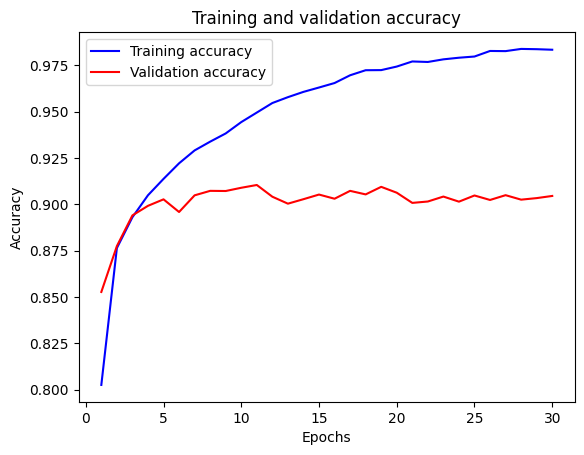

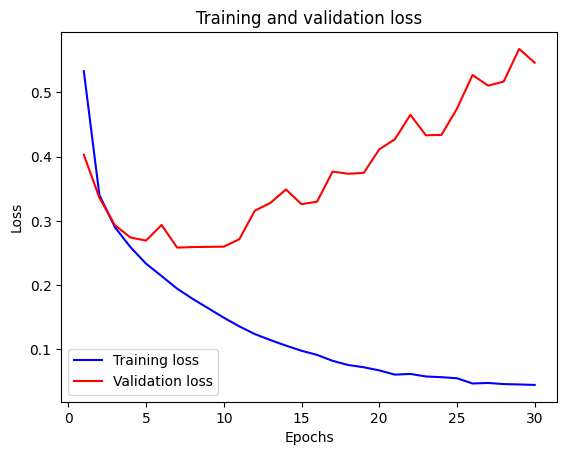

In [9]:
# Get a history of accuracy and loss during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy graph
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plotting the loss graph
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It can be seen that the accuracy on the training data increases rapidly, much faster than that of the fully connected neural network. But on the test data, the results are much worse, the error increases significantly after the 10th epoch, which indicates the phenomenon of overtraining.

---

As a result of the research, we found that the accuracy of the convolutional neural network is higher compared to the fully connected one (from the previous homework), namely 98% versus 91.5%. It also became clear that training a convolutional neural network takes more time.

### PART 2

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Loading and preparing data:

In [11]:
# Loading and preparing data
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
# Resize images to 32x32 and add a third color channel
train_x = np.expand_dims(train_x, axis=-1)
train_x = np.repeat(train_x, 3, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
test_x = np.repeat(test_x, 3, axis=-1)
train_x = tf.image.resize(train_x, [32, 32])
test_x = tf.image.resize(test_x, [32, 32])
train_x = train_x / 255.0
test_x = test_x / 255.0

# Coding of categorical labels
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [12]:
# Loading convolutional framework VGG16
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freezing of the convolutional base
vgg16_base.trainable = False

# Adding fully connected layers for classification
x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=output)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(test_x, test_y)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 234s 155ms/step - accuracy: 0.7690 - loss: 0.6626 - val_accuracy: 0.8347 - val_loss: 0.4454
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 233s 156ms/step - accuracy: 0.8528 - loss: 0.4044 - val_accuracy: 0.8499 - val_loss: 0.4082
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 245s 163ms/step - accuracy: 0.8650 - loss: 0.3662 - val_accuracy: 0.8525 - val_loss: 0.3972
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 248s 166ms/step - accuracy: 0.8749 - loss: 0.3329 - val_accuracy: 0.8613 - val_loss: 0.3781
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 233s 155ms/step - accuracy: 0.8813 - loss: 0.3171 - val_accuracy: 0.8669 - val_loss: 0.3610
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 237s 158ms/step - accuracy: 0.8849 - loss: 0.3056 - val_accuracy: 0.8673 - val_loss: 0.3624
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 287s 191ms/step - accuracy: 0.8920 - loss: 0.2915 - val_accuracy: 0.8593 - val_loss: 0.3876
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 283s 189ms/step - ac

It is important to say that training the convolutional base VGG16 takes much more time, in our case - 43 minutes.
As a result, we obtained accuracy on the training data 91%, and on the test data - 86%.
Having conducted parallel training with an increased batch size (512), we obtained slightly worse results in terms of accuracy (less by 1-2%) and did not achieve acceleration of the training process.
We conducted all these trainings at the CPU.

In [13]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,518,048 (59.20 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 535,574 (2.04 MB)

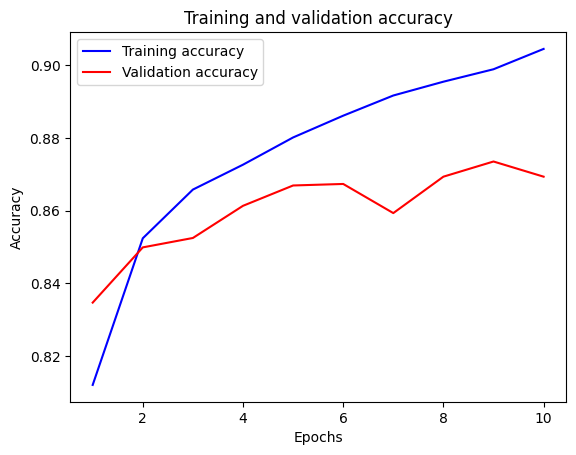

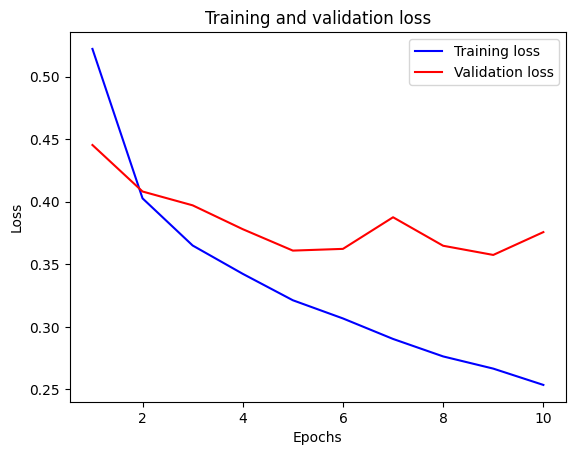

In [14]:
import matplotlib.pyplot as plt

# Get a history of accuracy and loss during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy graph
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plotting the loss graph
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Using the GPU, you don't need to wait for hour of training, the process of learning the model is much faster.

In [15]:
# Loading convolutional framework VGG16
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freezing of the convolutional base
vgg16_base.trainable = False

# Adding fully connected layers for classification
x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=output)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(test_x, test_y)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 199s 526ms/step - accuracy: 0.7320 - loss: 0.8004 - val_accuracy: 0.8290 - val_loss: 0.4682
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 204s 545ms/step - accuracy: 0.8457 - loss: 0.4251 - val_accuracy: 0.8459 - val_loss: 0.4259
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 201s 537ms/step - accuracy: 0.8560 - loss: 0.3930 - val_accuracy: 0.8494 - val_loss: 0.3992
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 240s 640ms/step - accuracy: 0.8691 - loss: 0.3536 - val_accuracy: 0.8582 - val_loss: 0.3907
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 248s 661ms/step - accuracy: 0.8735 - loss: 0.3429 - val_accuracy: 0.8633 - val_loss: 0.3749
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 230s 614ms/step - accuracy: 0.8781 - loss: 0.3255 - val_accuracy: 0.8639 - val_loss: 0.3696
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 204s 545ms/step - accuracy: 0.8856 - loss: 0.3082 - val_accuracy: 0.8608 - val_loss: 0.3793
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 206s 551ms/step - accuracy: 0.8878 -

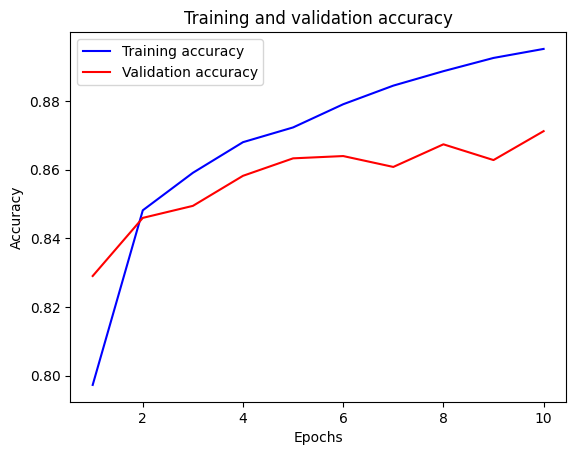

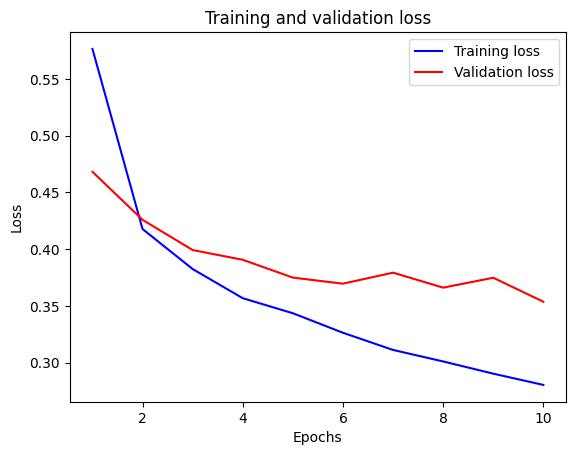

In [16]:
import matplotlib.pyplot as plt

# Get a history of accuracy and loss during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy graph
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plotting the loss graph
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

😅 "Give me back my 43 minutes of life. GPU beast."😅
- Initial Metrics (Epoch 1):
    - Model 1: accuracy: 0.7690, loss: 0.6626, val_accuracy: 0.8347, val_loss: 0.4454
    - Model 2: accuracy: 0.7320, loss: 0.8004, val_accuracy: 0.8290, val_loss: 0.4682

Model 1 starts with higher accuracy and lower losses on both the training and validation sets.

- Improvement During Training:
    - Model 1 improves accuracy to 90.56% and reduces loss to 0.2500 on the training set, and on the validation set to 86.93% and 0.3758, respectively.
    - Model 2 improves accuracy to 89.35% and reduces loss to 0.2817 on the training set, and on the validation set to 87.12% and 0.3537, respectively.

Both models show significant improvement, but Model 2 has slightly better validation accuracy and lower losses.

- Test Results:
    - Model 1: Test Accuracy: 0.8611, Test Loss: 0.3832
    - Model 2: Test Accuracy: 0.8735, Test Loss: 0.3647

Model 2 shows better results on the test set.

- Training Time:
    - Model 1 has more iterations per epoch, which takes more time per epoch.
    - Model 2 has fewer iterations per epoch, which reduces the overall training time.

- Conclusions:
    - Model 2 shows better results on the test data, with higher accuracy (87.35% vs. 86.11%) and lower losses (0.3647 vs. 0.3832).
    - Model 1 has slightly better results on the training set but falls short compared to Model 2 on the test set.
    - The overall training time for Model 1 is higher due to more iterations per epoch.
    - Both models show minor overfitting, but both generalize well on the test data.

Thus, both models are effective, but Model 2 has a slight advantage in accuracy and losses on the test data, making it slightly better for real-world use.